# Suspicious data, missing data and outliers 

We are looking into the Melbourne housing data set and decide on a simplified start: *Analyzing the correlation between the price of a house and the year it was built in*. However, when exploring the data, we quickly realize there are some problems: Some data points have suspicious values, other values are missing. We will look at the outliers and also decide to try out and compare the following approaches for missing values:
- Find and correct for obivious errors
- Drop rows with NA
- Impute the mean
- Use the data imputation technique discussed in the lecture, using only the 'Suburb' attribute to select a similar random record (hot deck imputation).

We will also plot the distribution of the Price and the YearBuilt attribute for each method and analyze what happens. We need to be cautious at each step!

As a first step, we take a deeper look at the data.

In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib as pl
import matplotlib.pyplot as plt

## Load the data


In [2]:
# Load the dataset
df = pd.read_csv('Melbourne_housing_FULL.csv')
print(df.columns)
print(df.shape)
df.head()

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')
(34857, 21)


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


## Remove unnecessary dimensions from the dataset
We remove some columns we do not need for our example. Also, let us explore the Price and BuiltYear variables more in detail.

In [3]:
df = df[['Suburb','Price','YearBuilt']]
df.describe()


,Price,YearBuilt
count,2.724700e+04,15551.000000
mean,1.050173e+06,1965.289885
std,6.414671e+05,37.328178
min,8.500000e+04,1196.000000
25%,6.350000e+05,1940.000000
50%,8.700000e+05,1970.000000
75%,1.295000e+06,2000.000000
max,1.120000e+07,2106.000000


In [4]:
# make a copy of the reduced dataframe for later comparisons:
df_before_cleaning = df.copy()

<Axes: xlabel='YearBuilt', ylabel='Price'>

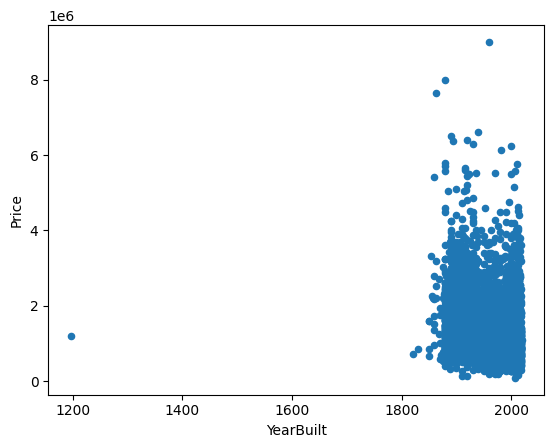

In [5]:
df_before_cleaning.plot.scatter('YearBuilt','Price')

**Task 1)** Looking at the YearBuild variable, we notice there is something suspicious with some of the data point. What is it? How many buildings are affected?

Hint: You can sort a dataframe with sort_values: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html

In [25]:
df = df_before_cleaning.copy()
sorted_df = df.sort_values('YearBuilt', ascending=True)
print('sorted by year built ascending')
print(sorted_df.head(10))

sorted_df = df.sort_values('YearBuilt', ascending=False)
print('sorted by year built descending')
print(sorted_df.head(10))

is_null = df[~df['YearBuilt'].isnull()]
print('is_null values')
print(is_null)

sorted by year built ascending
                Suburb      Price  YearBuilt
16424   Mount Waverley  1200000.0     1196.0
13655  South Melbourne        NaN     1800.0
25762    Carlton North   720000.0     1820.0
3533       Collingwood   855000.0     1830.0
8030           Prahran   841000.0     1850.0
9626          St Kilda  1600000.0     1850.0
8935          Richmond  1600000.0     1850.0
4248           Fitzroy   677000.0     1850.0
14986          Fitzroy        NaN     1854.0
4214           Fitzroy  3310000.0     1854.0
sorted by year built descending
               Suburb      Price  YearBuilt
2453          Bulleen        NaN     2106.0
33033       Bentleigh  1100000.0     2019.0
34760  Sunshine North   890000.0     2018.0
2096    Brighton East  1310000.0     2018.0
34853      Yarraville   888000.0     2018.0
31564         Bulleen  1310000.0     2018.0
27594         Bulleen        NaN     2017.0
26573     Westmeadows   490000.0     2017.0
24147    Airport West   730000.0     2017.0
24

We should do something about these obviously incorrect data points. Our options here are:

- drop the affected rows
- delete just the values (i.e. replace it with np.nan)
- fix it manually with the most probable correct dates

**Task 2)** Choose one of the above and apply it to the dataset

In [26]:
# remove rows with wrong year built
df['YearBuilt'] = df['YearBuilt'].where(df['YearBuilt'] > 1800, np.nan)
df['YearBuilt'] = df['YearBuilt'].where(df['YearBuilt'] < 2024, np.nan)

As a result the following looks more reasonable.

In [27]:
df.describe()

,Price,YearBuilt
count,2.724700e+04,15548.000000
mean,1.050173e+06,1965.340944
std,6.414671e+05,36.777203
min,8.500000e+04,1820.000000
25%,6.350000e+05,1940.000000
50%,8.700000e+05,1970.000000
75%,1.295000e+06,2000.000000
max,1.120000e+07,2019.000000


<Axes: xlabel='YearBuilt', ylabel='Price'>

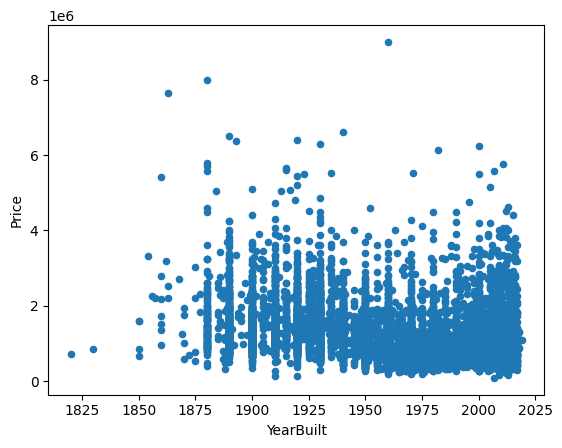

In [9]:
df.plot.scatter('YearBuilt','Price')

Next we want to check for missing data. **Note that a scatter plot only draws a point when no data dimensions of it are missing.** Therefore a scatter plot removes points with missing data implicitly.

Before we start our hunt for the missing data we define two functions that will help us analyze the results of our data wrangling steps.

In [10]:
# Given a dataframe, print the correlation and plot the distribution of the Price/YearBuilt attributes
def plot_details(df_d):
    print("Shape of dataframe")
    print(df_d.shape)
    
    print("Correlation Price / YearBuilt: ")
    print(df_d.corr(numeric_only=True)['Price']['YearBuilt'])
    print("")
    
    print("Price histogram")
    df_d['Price'].plot.hist(bins=30)
    plt.xlabel("Price")
    plt.ylabel("Frequency in bin")
    plt.show()
    
    print("YearBuilt histogram")
    df_d['YearBuilt'].plot.hist(bins=30)
    plt.xlabel("YearBuilt")
    plt.ylabel("Frequency in bin")
    plt.show()

Shape of dataframe
(34857, 3)
Correlation Price / YearBuilt: 
-0.3392141051117983

Price histogram


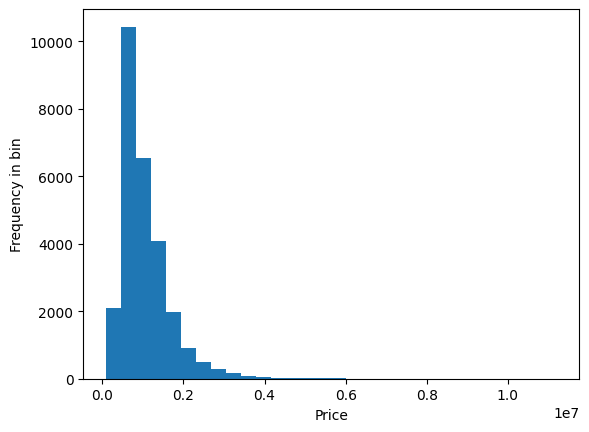

YearBuilt histogram


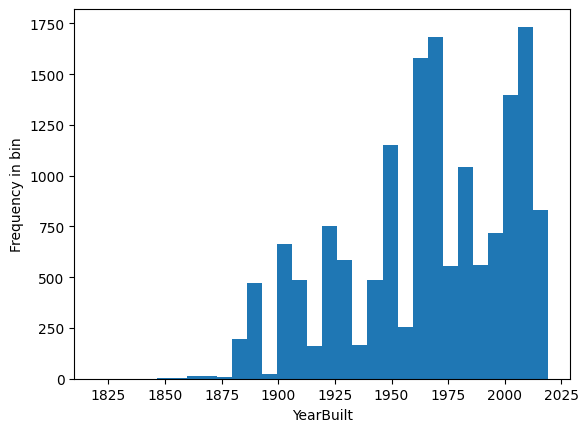

In [11]:
plot_details(df)

In [12]:
# Given two dataframes plot the histograms for comparison in one plot in different colors
#
def plot_compare_histograms(df_bef, df_aft):
    """Draw comparing histograms

    df_bef -- the dataframe receiving the label 'before'
    df_after -- the dataframe receiving the label 'after'
    """

    bins = np.linspace(0, 1e7, 50) 
    
    x = df_bef['Price']
    y = df_aft['Price']
    plt.hist([x, y], bins, label=['before', 'after'])
    plt.legend(loc='upper right')
    plt.xlabel("Price")
    plt.ylabel("Frequency in bin")

    plt.show()


    bins = np.linspace(1800, 2020, 44) 
    x = df_bef['YearBuilt']
    y = df_aft['YearBuilt']
    plt.hist([x, y], bins, label=['before', 'after'])
    plt.legend(loc='upper right')
    plt.xlabel("YearBuilt")
    plt.ylabel("Frequency in bin")
    plt.show()

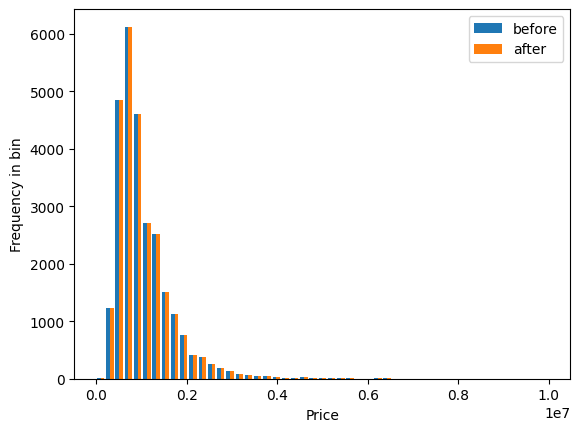

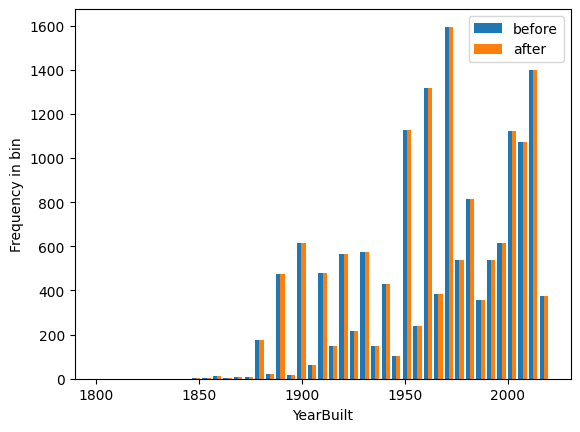

In [13]:
plot_compare_histograms(df_before_cleaning, df) 

## Drop NA Rows

**Task 3)** Use pandas functionality to drop either all rows with NA values or just the ones from a single column

              Price     YearBuilt
count  1.208300e+04  15548.000000
mean   1.077191e+06   1965.340944
std    6.713546e+05     36.777203
min    8.500000e+04   1820.000000
25%    6.320000e+05   1940.000000
50%    8.850000e+05   1970.000000
75%    1.320000e+06   2000.000000
max    9.000000e+06   2019.000000
Shape of dataframe
(15548, 3)
Correlation Price / YearBuilt: 
-0.3392141051117983

Price histogram


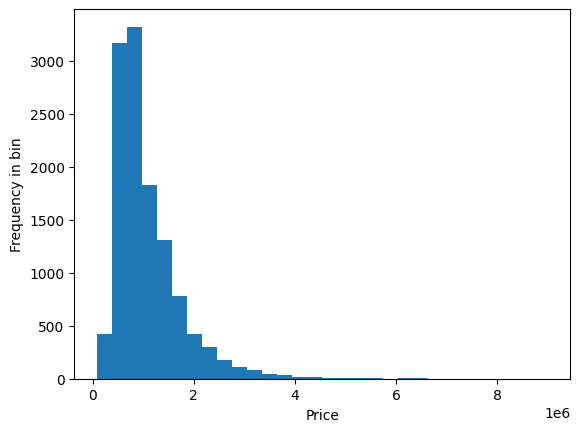

YearBuilt histogram


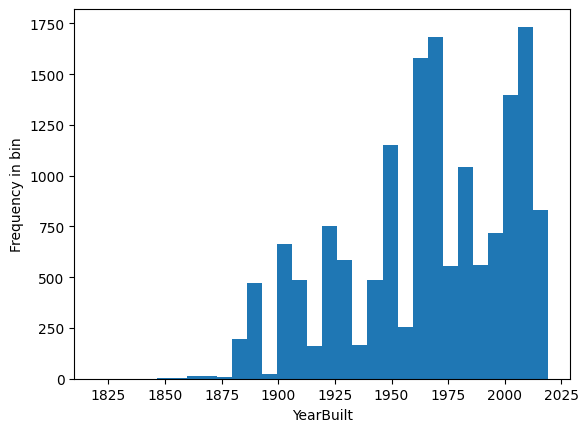

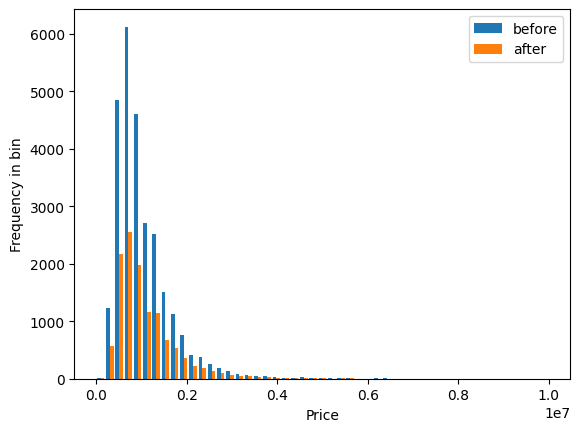

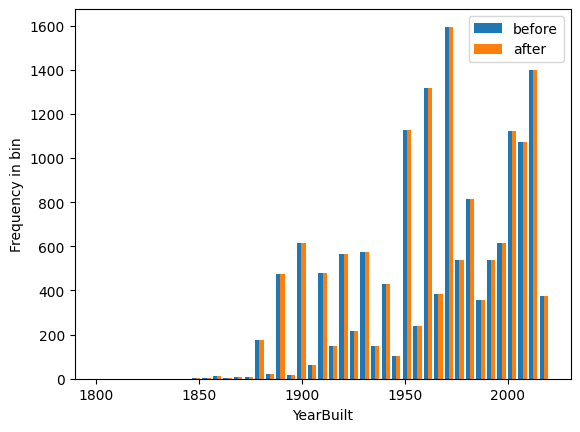

In [28]:
#TODO
df_drop = df.dropna()

df = df.dropna(subset=['YearBuilt'])
print(df.describe())
plot_details(df)
plot_compare_histograms(df_before_cleaning, df) 

We loose a significant part of our data, nearly two thirds. The distribution and the correlation have changed only very little. The latter is positive, as it hints towards being a case of "Missing completely at random", but we can't know for sure. It is still quite possible that we introduced a hidden bias by removing all this data.

## Imputation methods

### Mean Imputation

The price might be something we want to predict later, but just because the 'YearBuilt' attribute is empty we don't want to miss out on the whole row. Therefore, we try some data imputation, starting with the mean:

**Task 4)** Calculate the mean of the 'YearBuilt' column and then use the fillna function to insert the mean into all values that are NA. Optionally repeat the same thing for the 'Price' attribute.

In [15]:
# restore original dataframe
df = df_before_cleaning.copy()

# calculate mean
mean = int(df['YearBuilt'].mean())
print(f"Mean: {mean}")

# fill NaN with mean
df['YearBuilt'] = df['YearBuilt'].fillna(mean)
df.head(20)

Mean: 1965


,Suburb,Price,YearBuilt
0,Abbotsford,NaN,1965.0
1,Abbotsford,1480000.0,1965.0
2,Abbotsford,1035000.0,1900.0
3,Abbotsford,NaN,1965.0
4,Abbotsford,1465000.0,1900.0
5,Abbotsford,850000.0,1965.0
6,Abbotsford,1600000.0,2014.0
7,Abbotsford,NaN,2006.0
8,Abbotsford,NaN,1900.0
9,Abbotsford,NaN,1900.0


The distribution of both attributes is greatly changed, as we now have a large spike at the mean value. Correspondingly, the correlation coefficient is also much closer to 0 as many data points now have just the mean value which contains less information.

### Hot Deck Imputation (Advanced)

Instead of just using the mean, we can also use a hot deck imputation, meaning we take a random value of another building within the same suburb. 

**Optional Task 5)** complete the following code which takes a single row of the dataset. Check if the value is NA and if so, replace the value with a random one, taken from a subset of the dataframe containing only the same suburb. In case all of the objects in the suburb have no value for the 'YearBuilt' then we use the mean over all buildings instead.

Hints:
- To check if a value is NA, you can use the numpy ``isnan`` function
- With ``df.sample(1)`` you get a single random row of a given dataframe
- If you want to select the single value from a one-row dataframe, you can use ``iloc[0]``.
- The method takes a little while (~30 seconds) to compute, feel free to try it out with a smaller dataframe first, e.g. with ``df.head(500)``

In [ ]:
df_hot_deck = df.copy()

def fill_na(series):
  if (np.isnan(series['YearBuilt'])):
    sub_urb = series['Suburb'].sample(1)
    print(sub_urb)
    return series
  return series
  
    # if np.isnan(series['YearBuilt']):
    #     return np.random.choice(df['YearBuilt'])
    # return series

df_hot_deck['YearBuilt'] = df_hot_deck['YearBuilt'].apply(fill_na)
print (df_hot_deck.head(20))

In [ ]:
plot_details(df_hot_deck)
plot_compare_histograms(df, df_hot_deck)

The distributions for both attributes are preserved. However, the correlation between the price and the year the building was built is lower than in our original dataset. Unfortunately at this point, we cannot be sure what the reason behind the missing data is. It is however quite likely that using the dataframe with the imputed values might help us in the future when we want to predict house prices, because now we can easily use these data points, instead of just dropping them.

Optional: Have a look at the KNN-Imputer from scykit-learn https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html

###Forward and backward fill in time series data

In continuous data such as time series other imputation methods are better suited.

In [16]:
# Load the dataset and format the dataset
df_temp_time_series = pd.read_csv('global_temp_monthly.csv')
df_temp_time_series['Date'] = pd.to_datetime(df_temp_time_series['Date'], format='%Y-%m')
df_temp_time_series_chronol =  df_temp_time_series.sort_values('Date').reset_index(drop=True)
df_gistemp_time_series = df_temp_time_series_chronol[df_temp_time_series['Source'] == 'GISTEMP']
df_gistemp_two_years = df_gistemp_time_series.tail(24).reset_index(drop=True)
df_gistemp_time_series['Date'][15]

Timestamp('1880-08-01 00:00:00')

<Axes: xlabel='Date'>

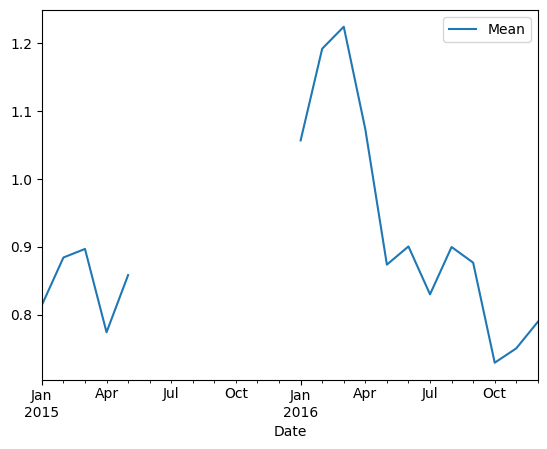

In [17]:
# set some consequtive timepoints to NA and inspect the result
df_gistemp_two_years.loc[5:11, "Mean"] = np.NAN
df_gistemp_two_years.plot.line('Date', 'Mean')

<Axes: xlabel='Date'>

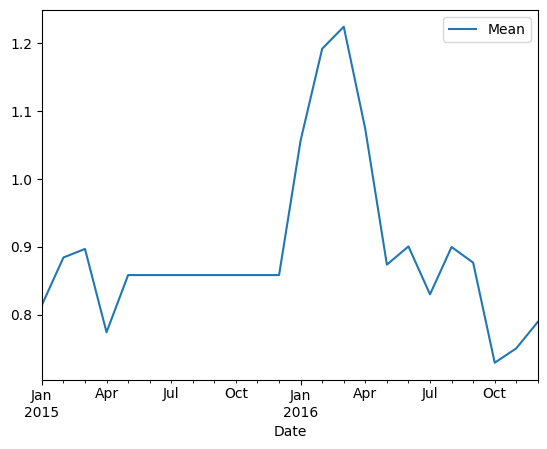

In [18]:
df_gistemp_imputed_ffill = df_gistemp_two_years.ffill()
df_gistemp_imputed_ffill.plot.line('Date', 'Mean')

<Axes: xlabel='Date'>

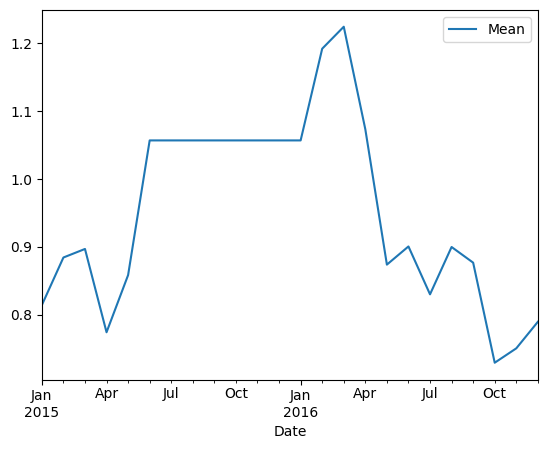

In [19]:
df_gistemp_imputed_bfill = df_gistemp_two_years.bfill()
df_gistemp_imputed_bfill.plot.line('Date', 'Mean')

Front ant back filling are a simple way of imputing but sometimes good enough. Can you come up with examples?

### Linear interpolation in time series data

/var/folders/62/d9_dj8bd7ss0m8nwdp6klbrr0000gn/T/ipykernel_39539/1605870495.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_gistemp_imputed_interp = df_gistemp_two_years.interpolate()


<Axes: xlabel='Date'>

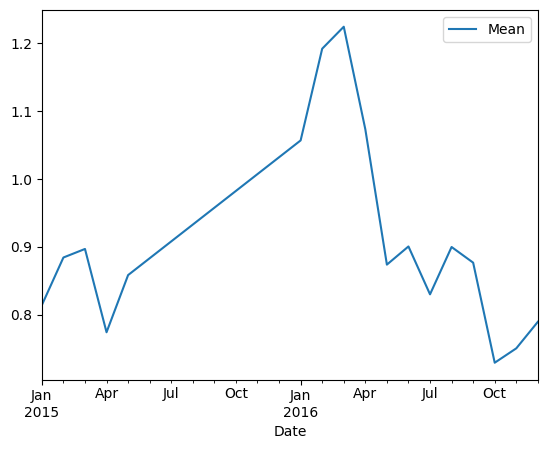

In [20]:
df_gistemp_imputed_interp = df_gistemp_two_years.interpolate()
df_gistemp_imputed_interp.plot.line('Date', 'Mean')

This interpolation gives a simple yet reasonable connection between the existing datapoints.

**Now back to the Melbourne dataset!**

## Outliers

Scikit learn provides us with an array of outlier detection methods. We now want to apply some of them to our dataset to see if/which outliers we have in our dataset.

Apply the following methods:

- IsolationForest
- Local Outlier Factor
- Z-Score

Links:

- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html
- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html
- https://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy.stats.zscore.html

In [29]:
# for the purpose of a better visualization we use a smaller sample of the data, 
# but feel free to try it out with the complete data set
df_small = df_drop.sample(1000)

# Expects two dataframes as parameters:
# df_normal: All non-outlier datapoints
# df_outliers: All outlier datapoints
def plot_outliers(df_normal, df_outliers):
    xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
    plt.title('Price - YearBuilt')

    b1 = plt.scatter(df_normal['Price'], df_normal['YearBuilt'], c='white',
                    s=20, edgecolor='k')
    c = plt.scatter(df_outliers['Price'], df_outliers['YearBuilt'], c='red',
                    s=20, edgecolor='k')
    plt.show()
    

### Isolation Forest

In [30]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(contamination = 0.05)
Y_if = isolation_forest.fit_predict(df_small[['Price', 'YearBuilt']])

**Optional Task 6:** Play with the contamination parameter a explore which part of the datapoints are the inliers.

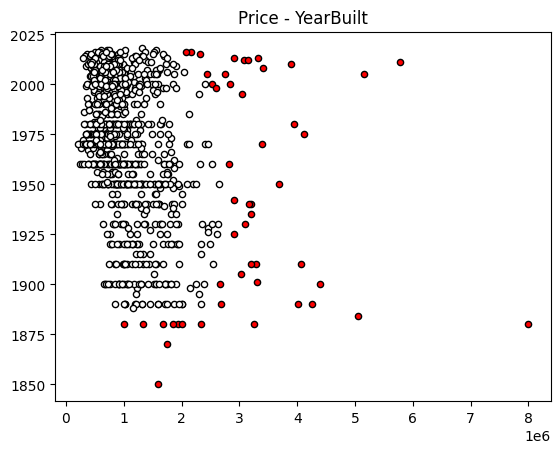

In [35]:
df_if_normal = df_small[Y_if == 1]
df_if_outliers = df_small[Y_if == -1]

plot_outliers(df_if_normal, df_if_outliers)

### Local Outlier Factor

In [36]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(contamination = "auto")
Y_lof = lof.fit_predict(df_small[['Price', 'YearBuilt']])

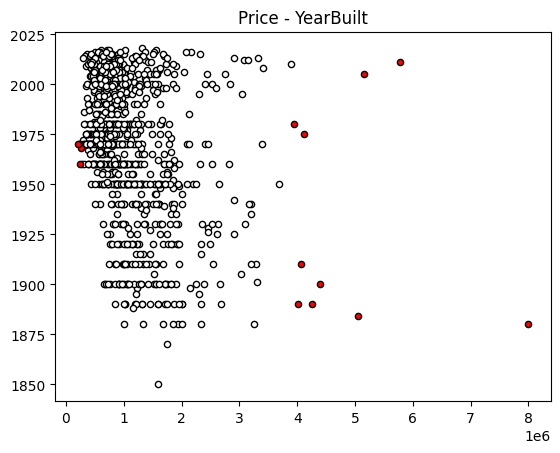

In [37]:
df_lof_outliers = df_small[Y_lof == -1]
df_lof_normal = df_small[Y_lof == 1]

plot_outliers(df_lof_normal, df_lof_outliers)

### Z Score

In [38]:
from scipy.stats import zscore

In [39]:
df_small['YearBuilt_zscore'] = zscore(df_small['YearBuilt'])

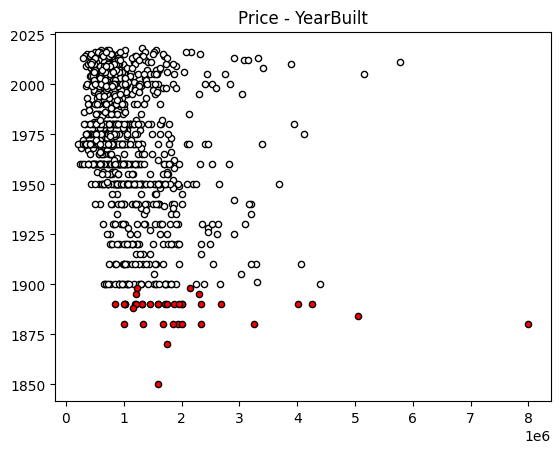

In [40]:
df_zs_is_outlier = (df_small['YearBuilt_zscore'] < -2) | (df_small['YearBuilt_zscore'] > 2)

df_zs_outliers = df_small[df_zs_is_outlier]
df_zs_normal = df_small[df_zs_is_outlier == False]

plot_outliers(df_zs_normal, df_zs_outliers)


**Optional Task 7:** Run the Z-Score outier detection on the 'Price' dimension.

This exercise shows that manually analyzing the data is very valuable. Lazily letting an algorithm do some work that you do not control futher is dangerous. This data set seems to be mostly clean (except for 2 obvious mistakes) and in this case you should not artificially change it by removing more "outliers" that an. It is advisable to closely inspect datapoints that get flagged as outliers and decide with domain knowledge if possible. In cases where the number of datapoint is too high to inspect manually at least a sample of these points should be inspected.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=24790f70-d51f-44d7-b027-e732db45d092' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>